## Introduction

En juin 2025, un dataset intitulé **"Advanced Soybean Agricultural Dataset"** a été publié sur la plateforme Kaggle par une équipe de chercheurs de l’Université de Tikrit (Irak) :

- Assistant Lecturer Basim Fahad Abdullah  
- Assistant Professor Dr. Dawood Salman Madad  
- Assistant Professor Wisam Dawood Abdullah

Ce jeu de données, composé de plus de 55 000 enregistrements, rassemble des informations agronomiques détaillées sur la culture du soja. Il inclut notamment des paramètres liés au type génétique des plants, aux conditions de stress hydrique, à l’application d’acide salicylique et à divers indicateurs biologiques des plantes (poids, teneur en protéines, chlorophylle, rendement, etc.).

### Pourquoi ce dataset m’a interpellé

Le **Togo** est aujourd’hui reconnu comme l’un des meilleurs producteurs de **soja biologique** en Afrique et dans le monde. Ce statut repose sur des pratiques agricoles respectueuses de l’environnement, mais la performance des cultures reste sensible à de nombreux facteurs agronomiques.

Ce dataset m’a donc paru particulièrement pertinent pour explorer les questions suivantes :

- Quels sont les facteurs qui influencent réellement le rendement du soja ?
- Peut-on utiliser les données collectées pour **aider les agriculteurs togolais à améliorer leurs productions**, tout en maintenant des pratiques respectueuses des normes bio ?

### Objectif de l’étude

L’objectif de ce travail est triple :

1. Analyser les variables agronomiques les plus influentes sur le rendement en soja ;
2. Construire un **modèle prédictif performant** à l’aide d’algorithmes de machine learning ;
3. Formuler des **recommandations concrètes et applicables** aux producteurs de soja bio au Togo, à partir d’analyses scientifiques.


In [ ]:
#  Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp
import os 
import glob
plt.style.use("ggplot")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data importation
df=pd.read_excel('soybean clean dataset.xlsx')
df.head()

,Salicylic Acid,Water Stress,Genotypes,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA)
0,C1,S1,G5,130.3,111,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,133943600
1,C2,S3,G4,132.0,80,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,12613100
2,C2,S1,G6,150.0,83,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,88626100
3,C1,S1,G1,140.8,66,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,157577800
4,C1,S2,G6,175.6,73,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.6,72960400


In [3]:
df.shape

(55450, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Salicylic Acid                           55450 non-null  object 
 1   Water Stress                             55450 non-null  object 
 2   Genotypes                                55450 non-null  object 
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  int64  
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [5]:
# Conversion de la variable Protein Content (PCO) en numérique
df['Protein Content (PCO)'] = pd.to_numeric(df['Protein Content (PCO)'], errors='coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Salicylic Acid                           55450 non-null  object 
 1   Water Stress                             55450 non-null  object 
 2   Genotypes                                55450 non-null  object 
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  int64  
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [7]:
df.describe(include='all')

,Salicylic Acid,Water Stress,Genotypes,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA)
count,55450,55450,55450,55450.000000,55450.000000,55450.00000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,53909.000000,5.545000e+04
unique,2,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C2,S1,G5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27726,20026,9242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,144.938979,114.533886,398.94661,627.210983,3.937670,2.399096,36.042123,35.349129,0.072132,2.020076,0.478102,8.998303e+07
std,NaN,NaN,NaN,20.015994,48.925533,257.48728,184.248647,2.846317,1.187323,2.417205,4.999200,0.022278,0.245889,0.226153,4.684108e+07
min,NaN,NaN,NaN,75.000000,32.000000,0.18000,0.640000,1.000000,1.100000,31.100000,26.400000,0.020000,1.400000,0.120000,2.470000e+03
25%,NaN,NaN,NaN,131.400000,80.000000,182.00000,625.000000,1.500000,1.300000,33.600000,32.200000,0.060000,1.850000,0.320000,5.191320e+07
50%,NaN,NaN,NaN,147.000000,102.000000,423.00000,673.000000,2.300000,2.200000,36.600000,34.500000,0.080000,2.050000,0.440000,8.767650e+07
75%,NaN,NaN,NaN,158.000000,133.000000,563.00000,722.000000,6.700000,3.100000,38.000000,37.200000,0.090000,2.200000,0.600000,1.217476e+08


In [8]:
df['Protein Content (PCO)'].isna().sum()

1541

In [9]:
# Remplace nan values with median
df.loc[df['Protein Content (PCO)'].isna()]=df['Protein Content (PCO)'].median()
df['Protein Content (PCO)'].isna().sum()

0

In [10]:
df.columns

Index(['Salicylic Acid', 'Water Stress', 'Genotypes', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Seed Yield per Unit Area (SYUA)'],
      dtype='object')

In [11]:
df['Genotypes'].value_counts()

Genotypes
G2      9242
G3      9242
G6      9241
G1      9241
G4      8728
G5      8215
0.44    1541
Name: count, dtype: int64

In [12]:
df['Salicylic Acid'].value_counts()

Salicylic Acid
C1      27210
C2      26699
0.44     1541
Name: count, dtype: int64

In [13]:
df['Water Stress'].value_counts()

Water Stress
S1      18485
S3      18484
S2      16940
0.44     1541
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Salicylic Acid                             0
Water Stress                               0
Genotypes                                  0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
Seed Yield per Unit Area (SYUA)            0
dtype: int64

In [15]:
df.isna().sum()

Salicylic Acid                             0
Water Stress                               0
Genotypes                                  0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
Seed Yield per Unit Area (SYUA)            0
dtype: int64

In [16]:
# categorical features
cat_features = ['Genotypes', 'Salicylic Acid', 'Water Stress']
# numerical features
num_features = df.drop(columns=cat_features).columns.tolist()

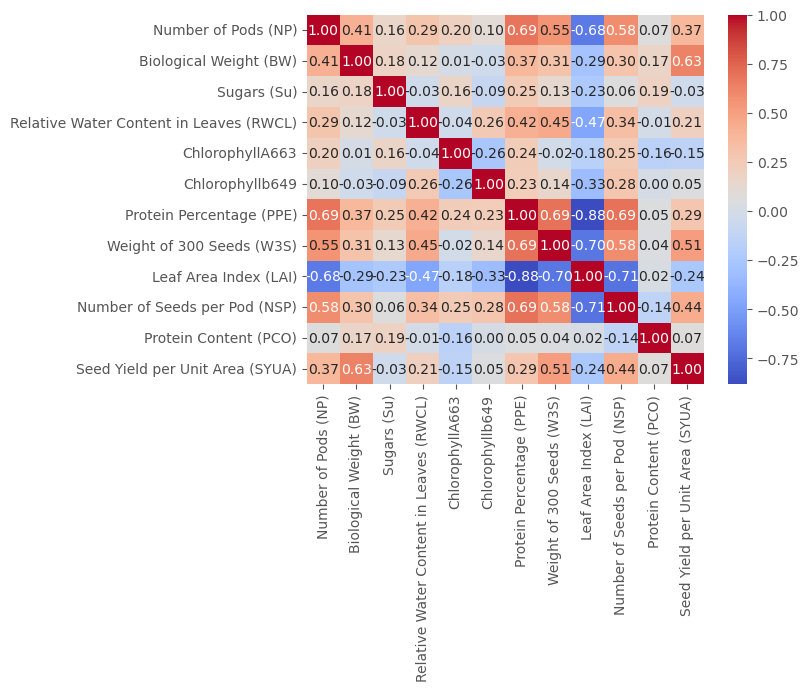

In [17]:
# Matrice de correlation
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
# Classement des variables qui ont une forte corrélation avec la variable cible 'Seed Yield per Unit Area (SYUA)'
df[num_features].corr()['Seed Yield per Unit Area (SYUA)'].sort_values(ascending=False)

Seed Yield per Unit Area (SYUA)            1.000000
Biological Weight (BW)                     0.631047
Weight of 300 Seeds (W3S)                  0.512001
Number of Seeds per Pod (NSP)              0.435435
Number of Pods (NP)                        0.374610
Protein Percentage (PPE)                   0.285797
Relative Water Content in Leaves (RWCL)    0.206279
Protein Content (PCO)                      0.066696
Chlorophyllb649                            0.045178
Sugars (Su)                               -0.031263
ChlorophyllA663                           -0.146048
Leaf Area Index (LAI)                     -0.244248
Name: Seed Yield per Unit Area (SYUA), dtype: float64

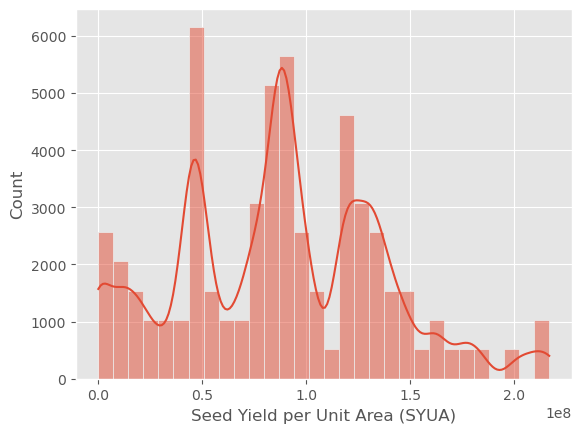

In [ ]:
# distribution of target
sns.histplot(df['Seed Yield per Unit Area (SYUA)'], kde=True, bins=30)
plt.show()

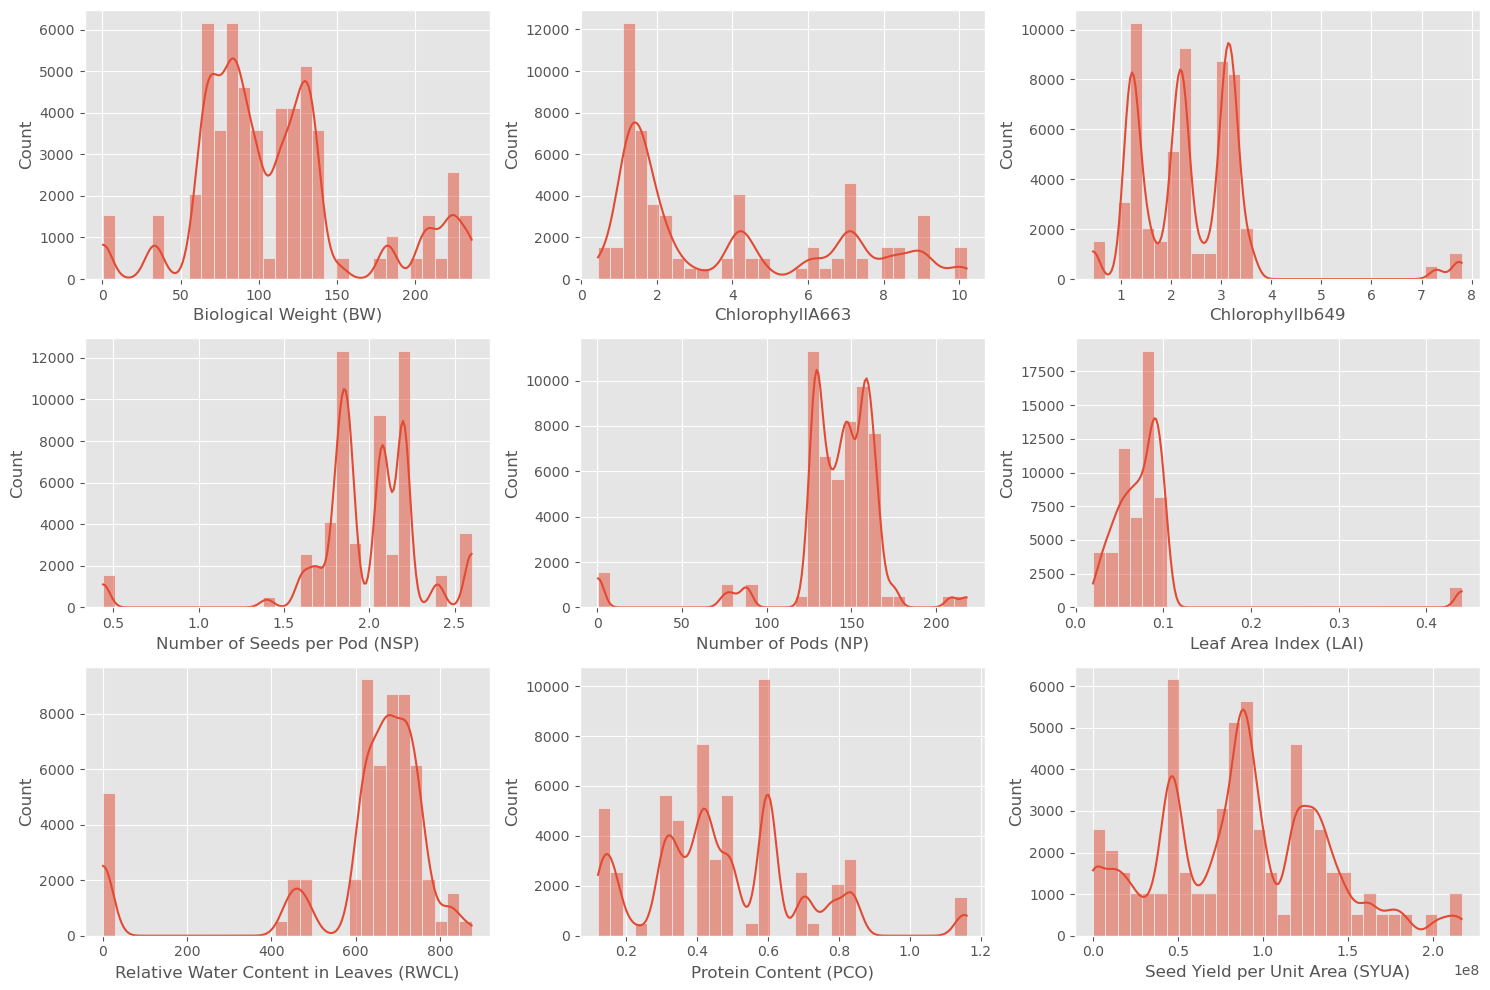

In [ ]:
# Distribution of numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  
sns.histplot(df['Biological Weight (BW)'], kde=True, bins=30, ax=axes[0, 0])
sns.histplot(df['ChlorophyllA663'], kde=True, bins=30, ax=axes[0, 1])
sns.histplot(df['Chlorophyllb649'], kde=True, bins=30, ax=axes[0, 2])
sns.histplot(df['Number of Seeds per Pod (NSP)'], kde=True, bins=30, ax=axes[1, 0])
sns.histplot(df['Number of Pods (NP)'], kde=True, bins=30, ax=axes[1, 1])
sns.histplot(df['Leaf Area Index (LAI)'], kde=True, bins=30, ax=axes[1, 2])  
sns.histplot(df['Relative Water Content in Leaves (RWCL)'], kde=True, bins=30, ax=axes[2, 0])  
sns.histplot(df['Protein Content (PCO)'], kde=True, bins=30, ax=axes[2, 1])    
sns.histplot(df['Seed Yield per Unit Area (SYUA)'], kde=True, bins=30, ax=axes[2, 2])
plt.tight_layout()
plt.show()

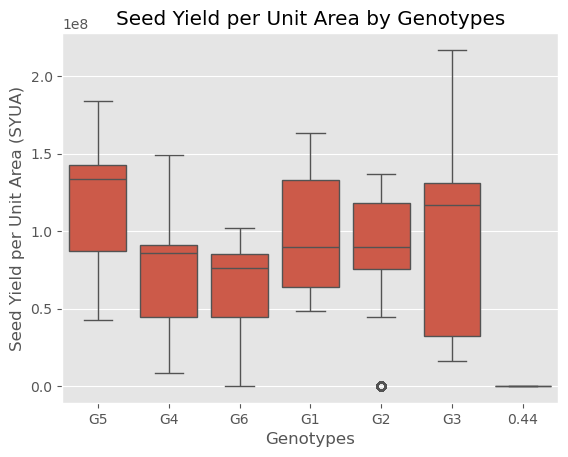

In [291]:
# boxplot de la variable cible par rapport aux variables categorique
sns.boxplot(x='Genotypes', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Seed Yield per Unit Area by Genotypes')
plt.show()

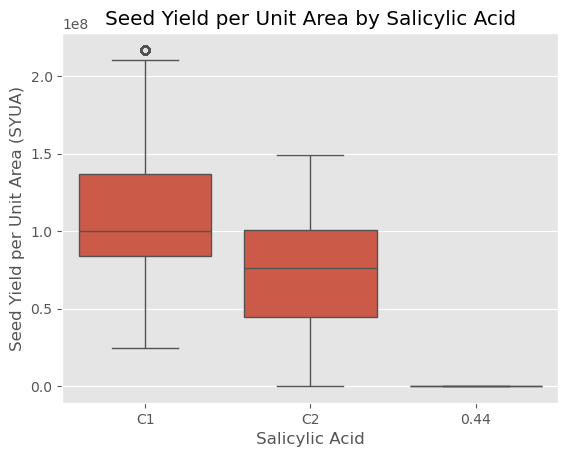

In [292]:
# boxeplot de la variable salicylic acid par rapport aux seed yield
sns.boxplot(x='Salicylic Acid', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Seed Yield per Unit Area by Salicylic Acid')
plt.show()

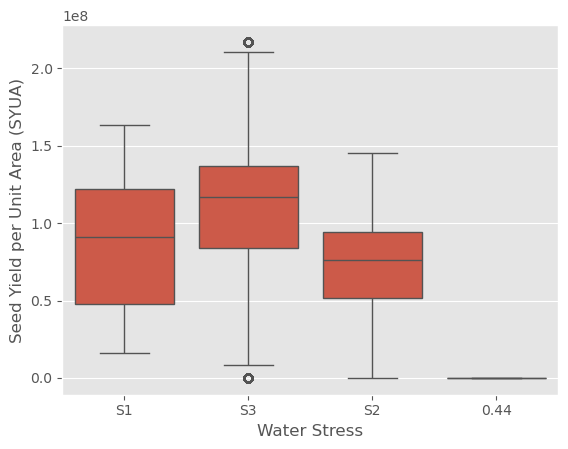

In [23]:
# boxeplot de la variable water stress par rapport aux seed yield
sns.boxplot(x='Water Stress', y='Seed Yield per Unit Area (SYUA)', data=df) 
plt.show()

In [166]:
df.head()

,Salicylic Acid,Water Stress,Genotypes,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA)
0,C1,S1,G5,130.3,111.0,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,133943600.0
1,C2,S3,G4,132.0,80.0,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,12613100.0
2,C2,S1,G6,150.0,83.0,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,88626100.0
3,C1,S1,G1,140.8,66.0,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,157577800.0
4,C1,S2,G6,175.6,73.0,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.60,72960400.0


In [180]:
# copy df in df1
df1=df.copy()
# df1 columns 
df1.columns

Index(['Salicylic Acid', 'Water Stress', 'Genotypes', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Seed Yield per Unit Area (SYUA)'],
      dtype='object')

In [181]:
# Categoric and numeric columns 
df1_cat_cols = ['Salicylic Acid', 'Water Stress', 'Genotypes']
df1_num_cols = df1.drop(['Salicylic Acid', 'Water Stress', 'Genotypes'], axis=1).columns


In [182]:
# Categoricals labels encoding
df1=pd.get_dummies(df1, columns=df1_cat_cols, drop_first=True, dtype='int')


In [185]:
# Features and target 
X = df1.drop('Seed Yield per Unit Area (SYUA)', axis=1)
y = df1['Seed Yield per Unit Area (SYUA)']
X.columns

Index(['Number of Pods (NP)', 'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Salicylic Acid_C1', 'Salicylic Acid_C2', 'Water Stress_S1',
       'Water Stress_S2', 'Water Stress_S3', 'Genotypes_G1', 'Genotypes_G2',
       'Genotypes_G3', 'Genotypes_G4', 'Genotypes_G5', 'Genotypes_G6'],
      dtype='object')

In [189]:
x_cat_cols = ['Salicylic Acid_C1', 'Salicylic Acid_C2', 'Water Stress_S1','Water Stress_S2', 'Water Stress_S3', 
                  'Genotypes_G1', 'Genotypes_G2','Genotypes_G3', 'Genotypes_G4', 'Genotypes_G5', 'Genotypes_G6']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisation function 
def scale(X):
    X_cat = X[x_cat_cols]
    X_num = X.drop(x_cat_cols, axis=1)

    X_num_id = X_num.index
    X_num_col = X_num.columns

    # Standardisation of numerical features
    X_tmp = StandardScaler().fit_transform(X_num)  # np array
    X_tmp = pd.DataFrame(X_tmp, index= X_num_id, columns= X_num_col)  # conversion to dataframe

    X_scaled = pd.concat([X_tmp, X_cat], axis= 1)  # Normalisation

    return X_scaled

In [ ]:
# Data spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(f'Training set X shape : {X_train.shape} \t y shape : {y_train.shape}')
print(f'Testing set X shape : {X_test.shape} \t y shape {y_test.shape}')



Training set X shape : (44360, 22) 	 y shape : (44360,)
Testing set X shape : (11090, 22) 	 y shape (11090,)


In [ ]:
# Data scaling 
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
# Importing necessary libraries for model training
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluted function and return r2 score
def model_evaluation(model, xtrain, xtest):
    """_summary_

    Args:
        model (_estimator_): 
        X_train (_data_): 
        y_train (_type_data_): 
    return :
        r2 train score 
        r2 test score
    """
    # Nom du model
    print(model)
    # Mean squard error 
    print('--------------------------------------------------------------------')
    print(f'MSE of Train set : {mean_squared_error(y_train, model.predict(xtrain))}')
    print(f'MSE of test set : {mean_squared_error(y_test,model.predict(xtest))}')

    # Mean absolute error
    print('--------------------------------------------------------------------')
    print(f'MAE of Train set : {mean_absolute_error(y_train, model.predict(xtrain))}')
    print(f'MAE of test set : {mean_absolute_error(y_test,model.predict(xtest))}')

    # R^2 score
    print('--------------------------------------------------------------------')
    print(f'R^2 of Train set : {r2_score(y_train, model.predict(xtrain)):.4f}')
    print(f'R^2 of test set : {r2_score(y_test,model.predict(xtest)):.4f}')

# Metrics score function 
def metrics_score(model, X_train, X_test):
    # scores calcul arround with 4 digits
    r2_train = round(r2_score(y_train, model.predict(X_train)), 5)
    r2_test = round(r2_score(y_test, model.predict(X_test)), 5)

    # save the scores in dict
    resume = {
        'Model' : model, 'r2 train score ' : r2_train, 'r2 test score' :r2_test
    }
    return resume


In [ ]:
from sklearn.model_selection import learning_curve

# Learning curve fonction plot
def curve(model, X_train, y_train):
    # learning curve 
    N, train_score, test_score = learning_curve(model,X_train, y_train,train_sizes=np.linspace(0.1,1, 10),
                                                cv=5, random_state=1234)
    
    # plot 
    plt.plot(N, train_score.mean(axis=1), label='Training')
    plt.plot(N, test_score.mean(axis=1), label='Validation')
    plt.xlabel('Training size ')
    plt.title('Learning curve')
    plt.legend()
    plt.show()


Index(['Number of Pods (NP)', 'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Salicylic Acid_C1', 'Salicylic Acid_C2', 'Water Stress_S1',
       'Water Stress_S2', 'Water Stress_S3', 'Genotypes_G1', 'Genotypes_G2',
       'Genotypes_G3', 'Genotypes_G4', 'Genotypes_G5', 'Genotypes_G6'],
      dtype='object')

In [ ]:
# Models fiting 
models_1 = [RandomForestRegressor(random_state=1234), DecisionTreeRegressor(), GradientBoostingRegressor(), 
            AdaBoostRegressor()]
models_2 = [LinearRegression(), Lasso(alpha=0.1), Ridge(), KNeighborsRegressor()]

scores =[]
# This models do not use scaled data
for md in models_1 :
    # Model fiting
    md.fit(X_train, y_train)
    # Metrics Displaying
    model_evaluation(md, X_train,X_test)
    # scores saving
    tmp1= metrics_score(md, X_train, X_test)
    scores.append(tmp1)
    print('\n')

# This models use scaled 
for md in models_2:
    # Model fiting
    md.fit(X_train_scaled, y_train)
    # Metrics displaying
    model_evaluation(md, X_train_scaled,X_test_scaled)
    # scores saving
    tmp2 = metrics_score(md, X_train_scaled, X_test_scaled)
    scores.append(tmp2)
    print('\n')



RandomForestRegressor(random_state=1234)
--------------------------------------------------------------------
MSE of Train set : 3.089490332285345e-32
MSE of test set : 3.099521145052505e-32
--------------------------------------------------------------------
MAE of Train set : 2.9292268440515854e-17
MAE of test set : 2.9387373208179867e-17
--------------------------------------------------------------------
R^2 of Train set : 1.0000
R^2 of test set : 1.0000


DecisionTreeRegressor()
--------------------------------------------------------------------
MSE of Train set : 3.089490332285345e-32
MSE of test set : 3.099521145052505e-32
--------------------------------------------------------------------
MAE of Train set : 2.9292268440515854e-17
MAE of test set : 2.9387373208179867e-17
--------------------------------------------------------------------
R^2 of Train set : 1.0000
R^2 of test set : 1.0000


GradientBoostingRegressor()
-----------------------------------------------------------

In [ ]:

# converting scores to DataFrame
scores=pd.DataFrame(scores)

# diplay scores
display(scores)

,Model,r2 train score,r2 test score
0,"(DecisionTreeRegressor(max_features=1.0, rando...",1.00000,1.00000
1,DecisionTreeRegressor(),1.00000,1.00000
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.99746,0.99741
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.89540,0.89354
4,LinearRegression(),0.75644,0.75133
5,Lasso(alpha=0.1),0.75644,0.75133
6,Ridge(),0.75644,0.75133
7,KNeighborsRegressor(),1.00000,1.00000


In [270]:
# diplay scores sorted by r2 test score
scores.sort_values(by='r2 test score', ascending=False)

,Model,r2 train score,r2 test score
0,"(DecisionTreeRegressor(max_features=1.0, rando...",1.00000,1.00000
1,DecisionTreeRegressor(),1.00000,1.00000
7,KNeighborsRegressor(),1.00000,1.00000
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.99746,0.99741
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.89540,0.89354
4,LinearRegression(),0.75644,0.75133
5,Lasso(alpha=0.1),0.75644,0.75133
6,Ridge(),0.75644,0.75133


In [282]:
# Gradient fiting
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Featurs importance 
gb_Importance = pd.DataFrame({'Features' : X.columns, 'Importance' : gb.feature_importances_}).sort_values(by='Importance', ascending=False)
gb_Importance

,Features,Importance
1,Biological Weight (BW),0.391496
7,Weight of 300 Seeds (W3S),0.127781
0,Number of Pods (NP),0.126711
4,ChlorophyllA663,0.077148
9,Number of Seeds per Pod (NSP),0.055339
2,Sugars (Su),0.045119
5,Chlorophyllb649,0.037145
11,Salicylic Acid_C1,0.031328
15,Water Stress_S3,0.018643
3,Relative Water Content in Leaves (RWCL),0.017992


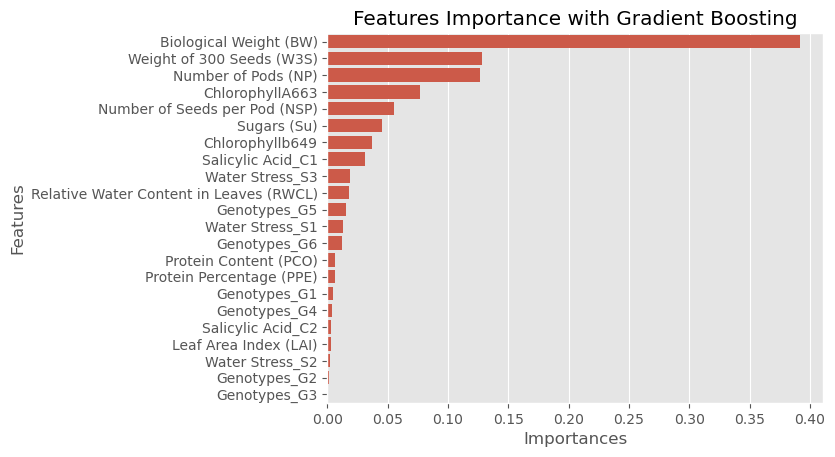

In [284]:
# ploting features importance
sns.barplot(x='Importance', y='Features', data=gb_Importance)
plt.title('Features Importance with Gradient Boosting')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.show()

In [ ]:
# Serealisation 
import joblib as jb
jb.dump(gb, 'GradientBoosting_model.pkl')

['GradientBoosting_model.pkl']

In [287]:
# Random forest Regressor 
rfr =RandomForestRegressor()
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [289]:
# features importance 
rfr_importance = pd.DataFrame({'Features' : X.columns, 'Importance' : rfr.feature_importances_}).sort_values(by='Importance', ascending=False)  
rfr_importance

,Features,Importance
1,Biological Weight (BW),0.454884
0,Number of Pods (NP),0.169616
7,Weight of 300 Seeds (W3S),0.100374
2,Sugars (Su),0.086400
9,Number of Seeds per Pod (NSP),0.069789
20,Genotypes_G5,0.033224
3,Relative Water Content in Leaves (RWCL),0.022665
21,Genotypes_G6,0.021869
14,Water Stress_S2,0.014912
8,Leaf Area Index (LAI),0.008388


In [290]:
# Serealisation 
jb.dump(rfr, 'RandomForest_model.pkl')

['RandomForest_model.pkl']

###  Conclusion

Les résultats issus de notre modèle de Gradient Boosting  et Random Forest montrent clairement que certaines variables ont un poids déterminant dans la prédiction du rendement en soja `Seed Yield per Unit Area`. En particulier, trois facteurs se démarquent nettement :

* **Le poids biologique total de la plante (Biological Weight)**,
* **Le poids de 300 graines (Weight of 300 Seeds)**,
* **Le nombre total de gousses (Number of Pods)**.

Ces variables indiquent que les meilleures performances en matière de rendement proviennent de plantes vigoureuses, bien développées et capables de produire des graines denses et nombreuses.

D'autres facteurs tels que la teneur en chlorophylle, le sucre foliaire, ou encore le traitement avec de faibles doses d'acide salicylique (C1) jouent également un rôle, quoique plus modéré. À l’inverse, les différences génétiques (Genotypes) et les niveaux de stress hydrique pris isolément semblent avoir un impact plus faible dans ce modèle.



###  Implication pour l’agriculture du soja au Togo

Ce travail a une **portée stratégique majeure** pour l'agriculture togolaise, notamment dans le secteur du **soja biologique**, dont le pays est un producteur reconnu. Voici les impacts concrets attendus :

1. **Amélioration des pratiques agricoles** : Les résultats orientent les agriculteurs vers des pratiques qui favorisent la biomasse et la qualité des graines, sans nécessairement recourir à des intrants chimiques.

2. **Valorisation des intrants naturels** : L’effet positif d’un traitement naturel comme l'acide salicylique à faible dose ouvre la voie à des techniques de stimulation respectueuses des normes bio.

3. **Aide à la décision pour les coopératives** : Ces données peuvent être utilisées pour créer des outils simples (Excel ou application mobile) permettant aux producteurs de prédire leur rendement en fonction de quelques mesures de terrain.

4. **Formation des agriculteurs** : Ce modèle peut servir de base pour former les groupements de producteurs sur les facteurs agronomiques clés à surveiller (poids, gousses, chlorophylle, etc.).


### En résumé :

Ce modèle prédictif transforme des données scientifiques en recommandations agricoles concrètes. Il offre un levier puissant pour renforcer la performance, la durabilité et la compétitivité du **soja bio togolais**, tout en restant fidèle aux principes de l’agroécologie.
